In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_id = "aanaxs4g"
# model_id = "ezb3xkqf"

In [2]:
ev_gdf = gpd.read_file("Output/Evaluation/"+model_id+".shp")

In [3]:
ev_gdf.head()

,patch_name,true_val,aanaxs4g,geometry
0,Iowa_2021_july_3584-4352,2.924980,2.154870,"POLYGON ((-94.56996 41.01761, -94.70794 41.017..."
1,Iowa_2021_july_4864-1024,3.549897,3.138951,"POLYGON ((-93.88006 42.81137, -94.01804 42.811..."
2,Iowa_2021_july_4608-4096,1.660582,1.407744,"POLYGON ((-94.01804 41.15560, -94.15602 41.155..."
3,Iowa_2021_july_1024-256,3.674230,3.127932,"POLYGON ((-95.94977 43.22531, -96.08776 43.225..."
4,Iowa_2021_july_2560-3584,4.317254,3.659494,"POLYGON ((-95.12189 41.43156, -95.25987 41.431..."


In [4]:
vmin = np.min(np.array(ev_gdf.loc[:,["true_val",model_id]]))
vmax = np.max(np.array(ev_gdf.loc[:,["true_val",model_id]]))

In [5]:
ev_gdf.shape

(512, 4)

<AxesSubplot: title={'center': 'Predicted Values'}>

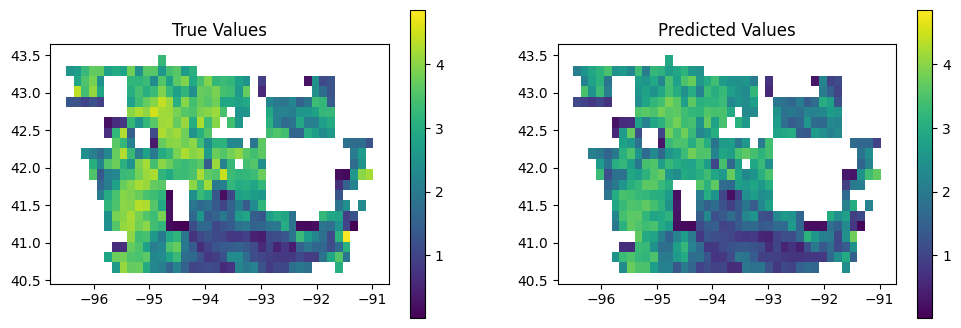

In [6]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].set_title("True Values")
ev_gdf.plot(column='true_val',ax=ax[0],legend=True,vmin=vmin,vmax=vmax,)
ax[1].set_title("Predicted Values")
ev_gdf.plot(column=model_id,ax=ax[1],legend = True,vmin=vmin,vmax=vmax)

In [7]:
ev_gdf.corr()

,true_val,aanaxs4g
true_val,1.000000,0.984902
aanaxs4g,0.984902,1.000000


array([[<AxesSubplot: xlabel='true_val', ylabel='true_val'>,
        <AxesSubplot: xlabel='aanaxs4g', ylabel='true_val'>],
       [<AxesSubplot: xlabel='true_val', ylabel='aanaxs4g'>,
        <AxesSubplot: xlabel='aanaxs4g', ylabel='aanaxs4g'>]],
      dtype=object)

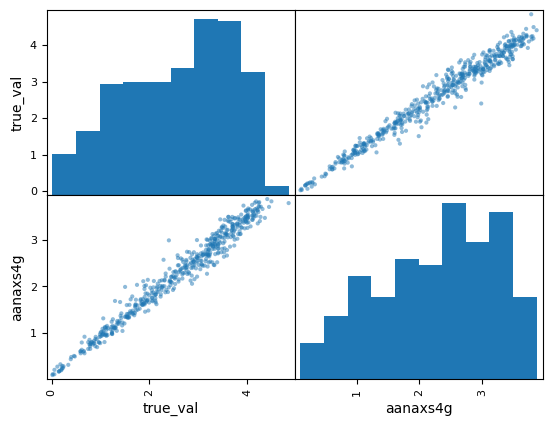

In [8]:
pd.plotting.scatter_matrix(ev_gdf)